In [2]:
%matplotlib inline
#This file will explore data from our current measurement set 
#outside of casa, and attempt to analyse signal amplitude across 
#a variety of baselines.

#initialize
from pyuvdata import UVData
import numpy as np
import numpy.ma as ma
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
import sys
import os
from hera_qm import xrfi as xrfi

UV=UVData()




In [3]:
#file to test with

UV.read_miriad('/data6/HERA/data/2458140/zen.2458140.12564.xx.HH.uvOR')



In [4]:
print UV.data_array

[[[[ 1.61195360e-03-0.0000000e+00j]
   [ 1.36916898e-03-0.0000000e+00j]
   [ 1.83304783e-03-0.0000000e+00j]
   ...
   [ 1.31275330e-03-0.0000000e+00j]
   [ 2.17683264e-03-0.0000000e+00j]
   [ 4.63185081e+01+0.0000000e+00j]]]


 [[[-4.10022301e-04+5.5208709e-04j]
   [-4.06789732e-05+1.9150473e-04j]
   [ 1.47982762e-04+2.4268789e-04j]
   ...
   [ 1.96044552e-04+2.4449421e-04j]
   [-6.13196744e-06+7.4075237e-05j]
   [-4.63195076e+01-1.5566985e-01j]]]


 [[[-8.77680141e-05+3.8240876e-04j]
   [-4.25205835e-05+2.9973756e-04j]
   [-9.99556578e-05+3.8401765e-04j]
   ...
   [-3.57183235e-05-3.3465411e-05j]
   [-9.20413004e-05-5.4656299e-05j]
   [ 4.63202972e+01+3.1135124e-01j]]]


 ...


 [[[ 5.94691746e-03+0.0000000e+00j]
   [ 5.84597932e-03+2.5093258e-10j]
   [ 5.98090515e-03+0.0000000e+00j]
   ...
   [ 3.32503095e-02+1.5096824e-09j]
   [ 7.70010874e-02-6.0362312e-11j]
   [ 4.65488777e+01-0.0000000e+00j]]]


 [[[ 5.14731742e-04-1.0020190e-03j]
   [ 5.25832293e-04-8.2882133e-04j]
   [ 6.366448

In [5]:
avgflag_Arr1=xrfi.flags2waterfall(UV)

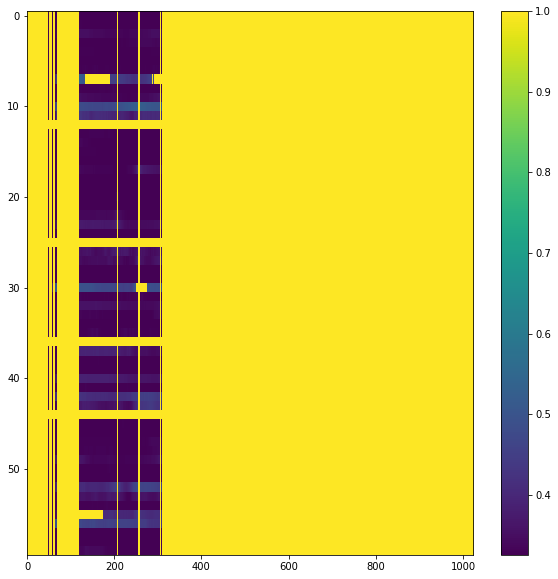

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(avgflag_Arr1,aspect='auto')
plt.colorbar()
plt.show()

In [7]:
folders4=glob.glob('/data6/HERA/data/2458140/*.uvOR')
folders4.sort()
ant1=1
ant2=11

first=True
avgflag_Arr=[]
#check the list
print(folders4)
print(len(folders4))

for folder in folders4:
    print('Accessing ' + folder)
    UV.read_miriad(folder)
    temp_array4=xrfi.flags2waterfall(UV)
    times=UV.get_times(ant1,ant2)
    print('Done.')
    if first==True:
        print('Initializing flags array')
        avgflag_Arr=temp_array4
        timearr4=times
        first=False
    else:
        print('vstacking...')
        avgflag_Arr=np.vstack((avgflag_Arr, temp_array4))
        timearr4=np.hstack((timearr4,times))
    print(first)
    print('temp shape:')
    print(temp_array4.shape)
    print('Current shape:')
    print(avgflag_Arr.shape)
    print ('Time shape')
    print(timearr4.shape)

['/data6/HERA/data/2458140/zen.2458140.12564.xx.HH.uvOR', '/data6/HERA/data/2458140/zen.2458140.13310.xx.HH.uvOR', '/data6/HERA/data/2458140/zen.2458140.14056.xx.HH.uvOR', '/data6/HERA/data/2458140/zen.2458140.14801.xx.HH.uvOR', '/data6/HERA/data/2458140/zen.2458140.15547.xx.HH.uvOR', '/data6/HERA/data/2458140/zen.2458140.16293.xx.HH.uvOR', '/data6/HERA/data/2458140/zen.2458140.17038.xx.HH.uvOR', '/data6/HERA/data/2458140/zen.2458140.17784.xx.HH.uvOR', '/data6/HERA/data/2458140/zen.2458140.18530.xx.HH.uvOR', '/data6/HERA/data/2458140/zen.2458140.19275.xx.HH.uvOR', '/data6/HERA/data/2458140/zen.2458140.20021.xx.HH.uvOR', '/data6/HERA/data/2458140/zen.2458140.20767.xx.HH.uvOR', '/data6/HERA/data/2458140/zen.2458140.21512.xx.HH.uvOR', '/data6/HERA/data/2458140/zen.2458140.22258.xx.HH.uvOR', '/data6/HERA/data/2458140/zen.2458140.23004.xx.HH.uvOR', '/data6/HERA/data/2458140/zen.2458140.23749.xx.HH.uvOR', '/data6/HERA/data/2458140/zen.2458140.24495.xx.HH.uvOR', '/data6/HERA/data/2458140/zen.

Mean of empty slice.
invalid value encountered in double_scalars


Done.
vstacking...
False
temp shape:
(60, 1024)
Current shape:
(600, 1024)
Time shape
(600,)
Accessing /data6/HERA/data/2458140/zen.2458140.20021.xx.HH.uvOR
Done.
vstacking...
False
temp shape:
(60, 1024)
Current shape:
(660, 1024)
Time shape
(660,)
Accessing /data6/HERA/data/2458140/zen.2458140.20767.xx.HH.uvOR
Done.
vstacking...
False
temp shape:
(60, 1024)
Current shape:
(720, 1024)
Time shape
(720,)
Accessing /data6/HERA/data/2458140/zen.2458140.21512.xx.HH.uvOR
Done.
vstacking...
False
temp shape:
(60, 1024)
Current shape:
(780, 1024)
Time shape
(780,)
Accessing /data6/HERA/data/2458140/zen.2458140.22258.xx.HH.uvOR
Done.
vstacking...
False
temp shape:
(60, 1024)
Current shape:
(840, 1024)
Time shape
(840,)
Accessing /data6/HERA/data/2458140/zen.2458140.23004.xx.HH.uvOR
Done.
vstacking...
False
temp shape:
(60, 1024)
Current shape:
(900, 1024)
Time shape
(900,)
Accessing /data6/HERA/data/2458140/zen.2458140.23749.xx.HH.uvOR
Done.
vstacking...
False
temp shape:
(60, 1024)
Current sh

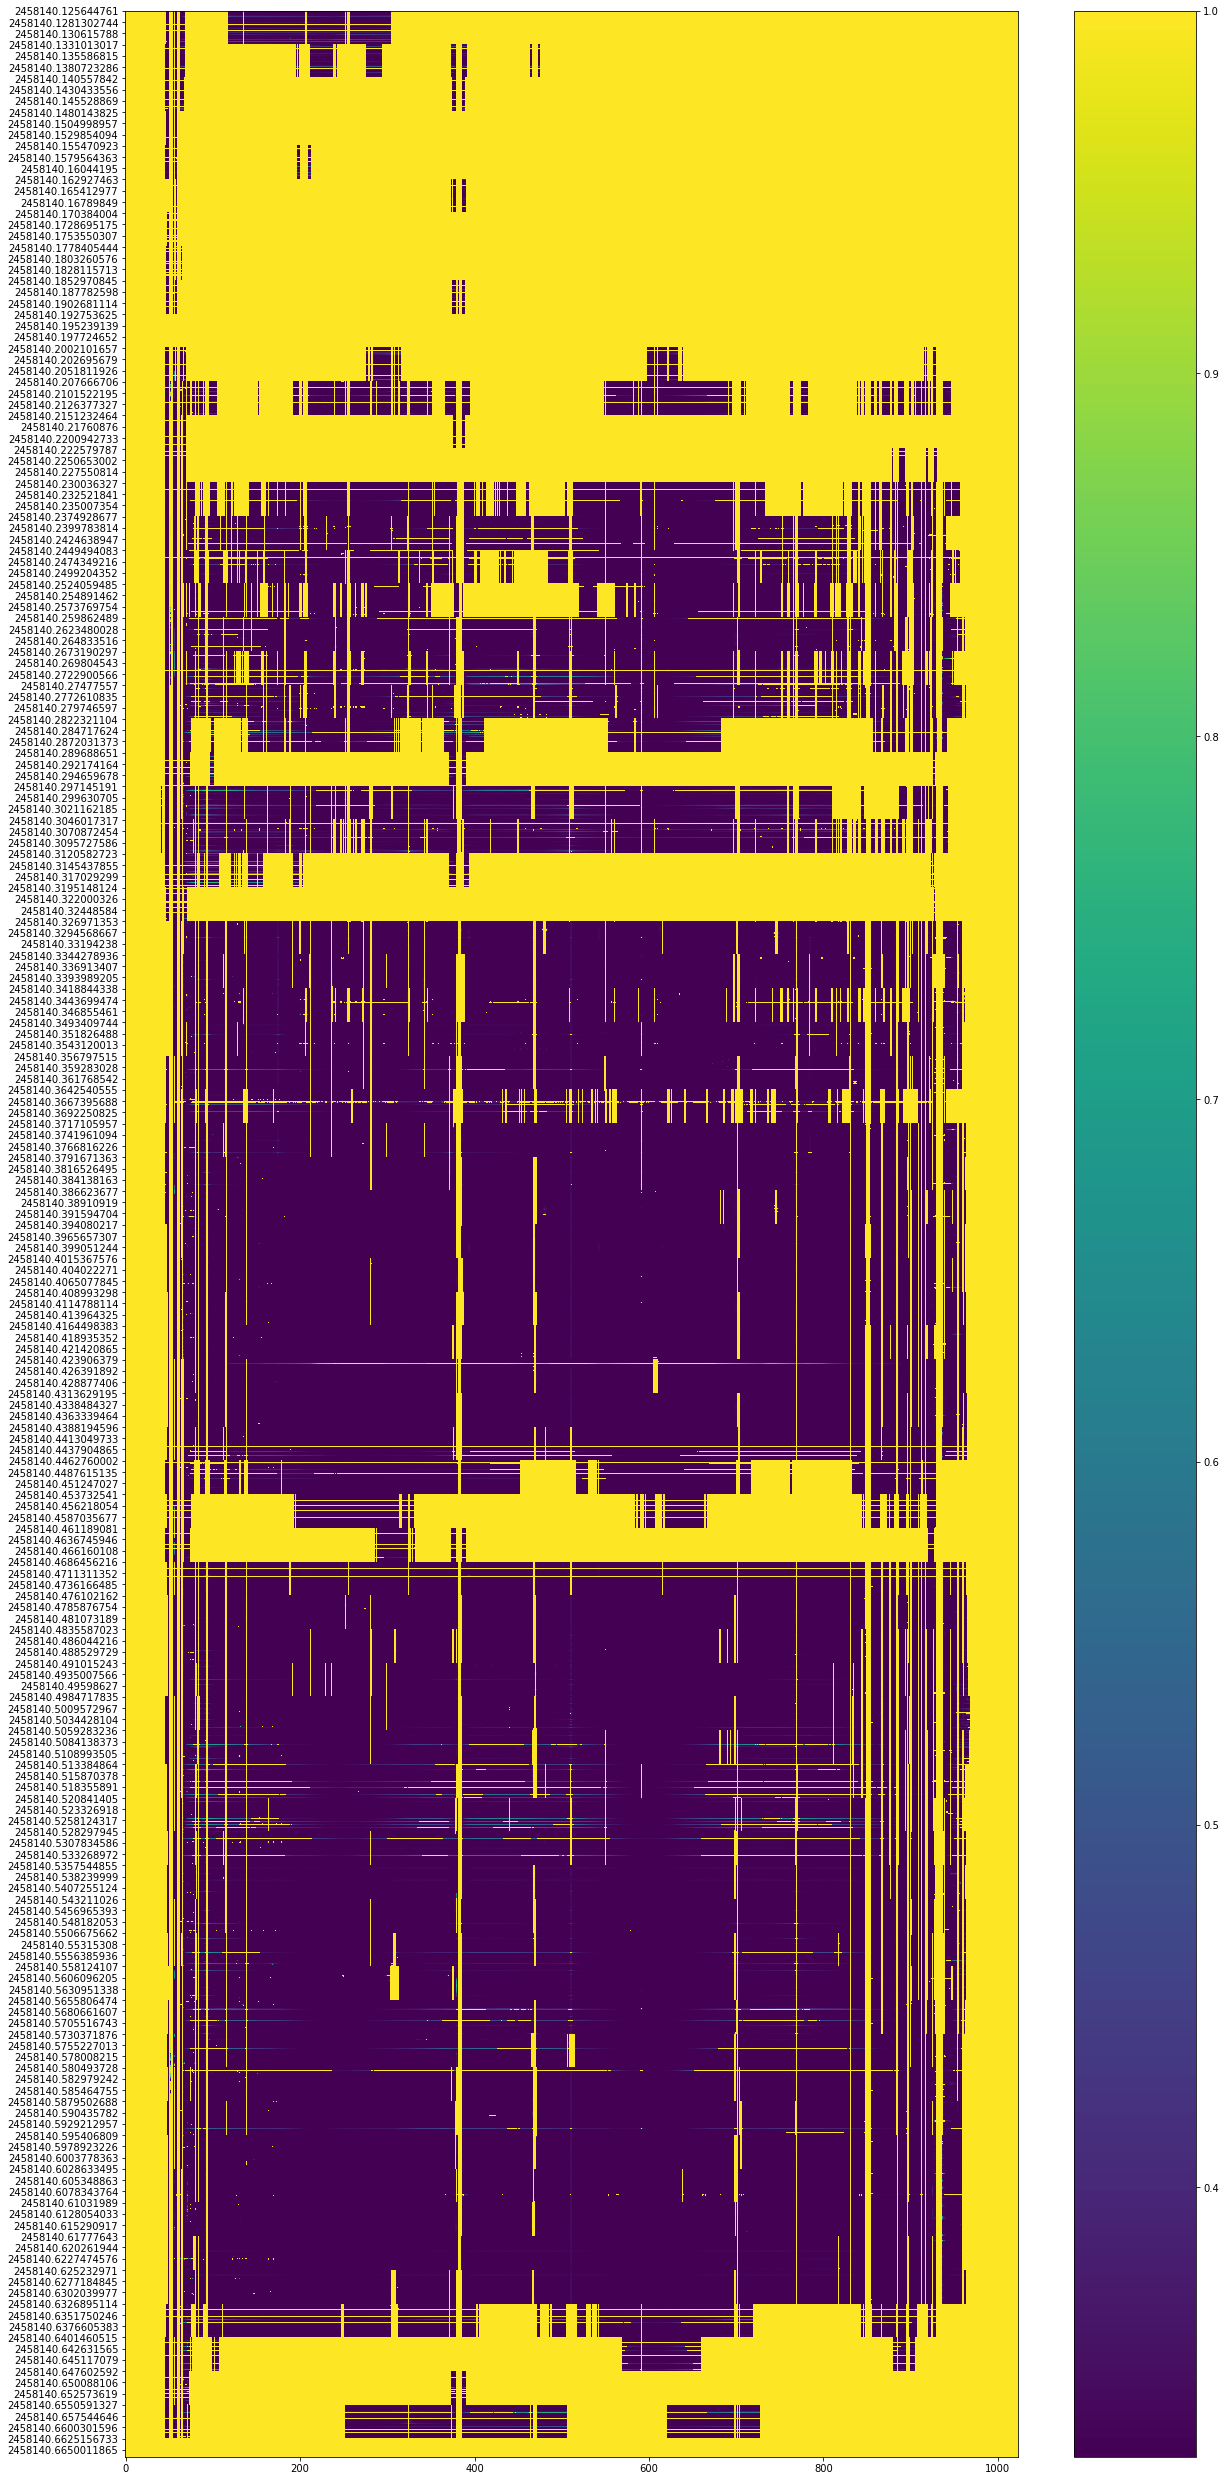

In [8]:
plt.figure(figsize=(20,45))
plt.imshow(avgflag_Arr, aspect='auto')
plt.yticks(np.arange(0,4353,20),timearr4[::20])
plt.colorbar()
plt.show()

The result is a waterfall of the flags averaged across all baselines. We can see the large areas of flagged data, as well as the areas where the choppy signal is still present. For reference, it would help to make the same plot for our good night of observations.

In [12]:
folders5=glob.glob('/data6/HERA/data/2458042/KM_uvR_files/*.xx.HH.uvR')
folders5.sort()

first=True
avgflag_Arr2=[]
#check the list
print(folders5)
print(len(folders5))

for folder in folders5:
    UV=UVData()
    UV.read_miriad(folder)
    print('Accessing ' + folder)
    temp_array5=xrfi.flags2waterfall(UV)
    print('Done.')
    if first==True:
        print('Settings flags for first time')
        avgflag_Arr2=temp_array5
        first=False
    else:
        print('vstacking...')
        avgflag_Arr2=np.vstack((avgflag_Arr2, temp_array5))
    print(first)
    print('temp shape:')
    print(temp_array5.shape)
    print('Current shape:')
    print(avgflag_Arr2.shape)
    

['/../../data6/HERA/data/2458042/KM_uvR_files/zen.2458042.12552.xx.HH.uvR', '/../../data6/HERA/data/2458042/KM_uvR_files/zen.2458042.13298.xx.HH.uvR', '/../../data6/HERA/data/2458042/KM_uvR_files/zen.2458042.14043.xx.HH.uvR', '/../../data6/HERA/data/2458042/KM_uvR_files/zen.2458042.14789.xx.HH.uvR', '/../../data6/HERA/data/2458042/KM_uvR_files/zen.2458042.15535.xx.HH.uvR', '/../../data6/HERA/data/2458042/KM_uvR_files/zen.2458042.16280.xx.HH.uvR', '/../../data6/HERA/data/2458042/KM_uvR_files/zen.2458042.17026.xx.HH.uvR', '/../../data6/HERA/data/2458042/KM_uvR_files/zen.2458042.17772.xx.HH.uvR', '/../../data6/HERA/data/2458042/KM_uvR_files/zen.2458042.18517.xx.HH.uvR', '/../../data6/HERA/data/2458042/KM_uvR_files/zen.2458042.19263.xx.HH.uvR', '/../../data6/HERA/data/2458042/KM_uvR_files/zen.2458042.20009.xx.HH.uvR', '/../../data6/HERA/data/2458042/KM_uvR_files/zen.2458042.20754.xx.HH.uvR', '/../../data6/HERA/data/2458042/KM_uvR_files/zen.2458042.21500.xx.HH.uvR', '/../../data6/HERA/data/

In [9]:
plt.figure(figsize=(20,200))
plt.imshow(avgflag_Arr2, aspect='auto')
plt.colorbar()
plt.show()

NameError: name 'avgflag_Arr2' is not defined

<Figure size 1440x14400 with 0 Axes>

The above figure shows the average flags for our good observation (2458042). As we can see, when compared to the figure above, there is much less flagging than the bad observation (2458140). This is a good visual comparison, a more intuitive comparison may be made by averaging these waterfall plots over time and channel respectively.

In [14]:
avgFlagavgTime_Arr=[]
avgFlagavgFreq_Arr=[]
avgFlagavgTime_Arr2=[]
avgFlagavgFreq_Arr2=[]

avgFlagavgTime_Arr=np.average(avgflag_Arr, axis=0)
avgFlagavgFreq_Arr=np.average(avgflag_Arr, axis=1)
avgFlagavgTime_Arr2=np.average(avgflag_Arr2, axis=0)
avgFlagavgFreq_Arr2=np.average(avgflag_Arr2, axis=1)
print(avgFlagavgTime_Arr)
print(avgFlagavgTime_Arr.shape)
print(avgFlagavgFreq_Arr)
print(avgFlagavgFreq_Arr.shape)

[ 1.  1.  1. ...,  1.  1.  1.]
(1024,)
[ 0.87357879  0.87363405  0.87643257 ...,  1.          1.          1.        ]
(4353,)


In [1]:
plt.figure(figsize=(15,15))
plt.plot(avgFlagavgTime_Arr, marker=".", linestyle='none', label='2458140')
plt.plot(avgFlagavgTime_Arr2, marker=".", linestyle='none',label='2458042')
plt.xlabel('Channel')
plt.ylabel('Flag Ratio')
plt.title('Flags(Time Averaged)')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

The above chart shows the ratio of flagged/unflagged data as averaged over the course of the entire night. The edges of the frequency range are flagged for both observations, but overall 2458140 has a much higher number of flags across the frequency range.

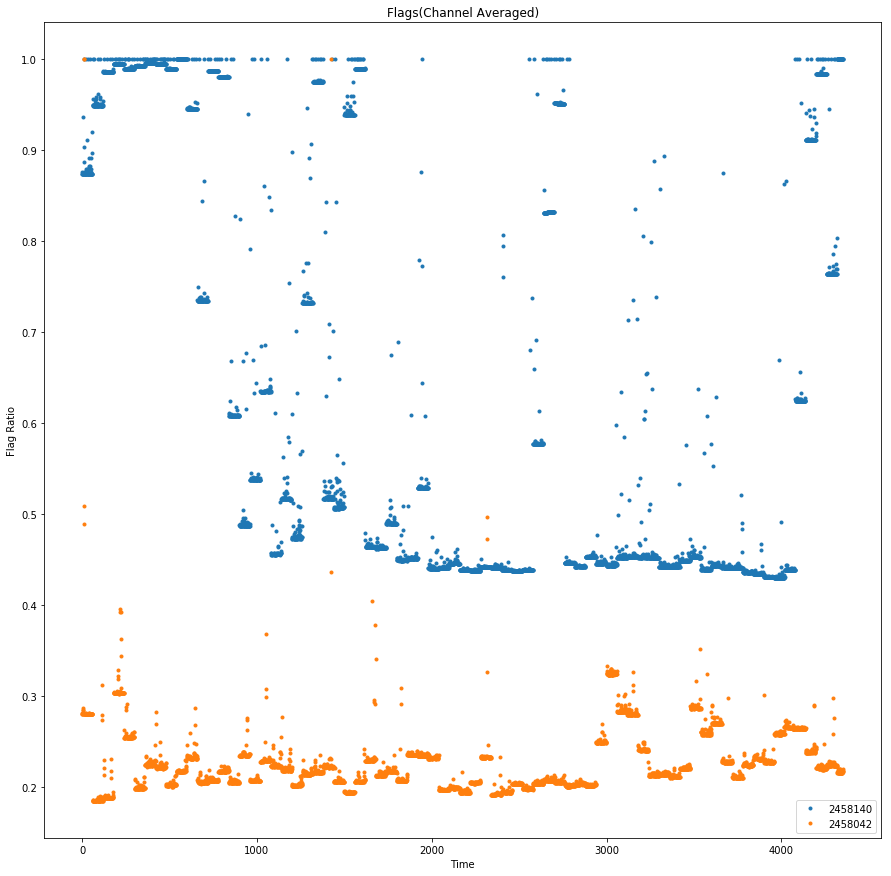

In [16]:
plt.figure(figsize=(15,15))
plt.plot(avgFlagavgFreq_Arr, marker=".", linestyle='none', label='2458140')
plt.plot(avgFlagavgFreq_Arr2, marker=".", linestyle='none',label='2458042')
plt.xlabel('Time')
plt.ylabel('Flag Ratio')
plt.title('Flags(Channel Averaged)')
plt.legend()
plt.show()

Similarly, this plot is averaged over frequency to display the ratio of flags across the course of the entire night. Once again, 2458140 has a much higher number of flags. Note that while these are displayed over relative time periods, they are not synced to LST or JDT, and as such are looking at different parts of the sky.